In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

In [71]:
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\cierre_2017.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,2017,1,1,1,1,310.521,0.000,45.60,14160.036,0,Miel
1,2017,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,Carne
2,2017,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,Ganado en pie
3,2017,1,1,1,3,2769.820,0.000,20.02,55451.796,0,Huevo-plato
4,2017,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,Carne


In [72]:
le = LabelEncoder() 
df['Nomproducto']= le.fit_transform(df['Nomproducto'])


In [74]:
# Estadística descriptiva para cada columna.
df.describe()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
count,33364.0,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,3.336400e+04,3.336400e+04,33364.000000
mean,2017.0,19.351157,104.390361,112.804850,7.008422,930.626722,64.973957,38.465256,2.061115e+04,5.298244e+04,1.738640
std,0.0,7.210192,46.148441,135.596668,4.427825,9076.133896,114.218916,20.428050,1.444663e+05,1.021284e+06,1.754574
min,2017.0,1.000000,1.000000,1.000000,1.000000,0.001000,0.000000,0.600000,2.000000e-02,0.000000e+00,0.000000
25%,2017.0,14.000000,72.000000,24.000000,3.000000,4.717750,1.370000,24.720000,1.646242e+02,0.000000e+00,0.000000
50%,2017.0,20.000000,105.000000,58.000000,6.000000,24.841500,16.915500,34.900000,8.070175e+02,0.000000e+00,2.000000
75%,2017.0,24.000000,128.000000,138.000000,12.000000,152.251750,73.314500,51.000000,4.499471e+03,4.050000e+02,2.000000
max,2017.0,32.000000,193.000000,570.000000,14.000000,806597.422000,592.261000,124.080000,7.482948e+06,5.624778e+07,6.000000


In [75]:

print('La forma de nuestras características es:', df.shape)



La forma de nuestras características es: (33364, 11)


In [77]:
X=df.iloc[:, [6,7]].values
y = df.iloc[:, 10].values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [81]:
from sklearn import metrics
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9555209207529073


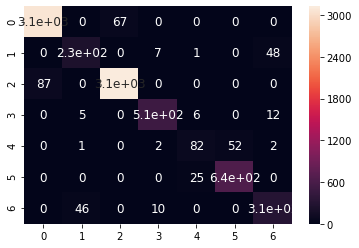

In [82]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

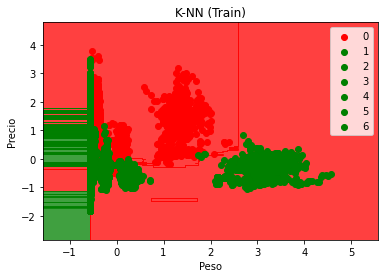

In [84]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) 
    
plt.title('K-NN (Train)')
plt.xlabel('Peso')
plt.ylabel('Precio')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

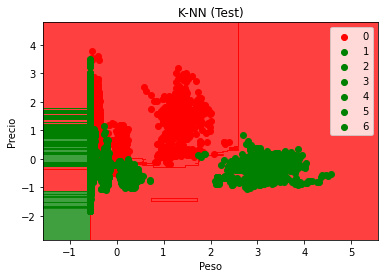

In [85]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Test)')
plt.xlabel('Peso')
plt.ylabel('Precio')
plt.legend()
plt.show()